In [45]:
import pandas as pd
import numpy as np

In [46]:
train_df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\sign_mnist_train\sign_mnist_train.csv")
test_df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\sign_mnist_test\sign_mnist_test.csv")

In [47]:
print("Training Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
train_df.head()

Training Data Shape: (27455, 785)
Test Data Shape: (7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [48]:
# Extract labels
y_train = train_df['label'].values
X_train = train_df.drop('label', axis=1).values

y_test = test_df['label'].values
X_test = test_df.drop('label', axis=1).values

In [49]:
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

In [50]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

print("X_train shape:", X_train.shape)
print("X_test shape:",  X_test.shape)

X_train shape: (27455, 28, 28, 1)
X_test shape: (7172, 28, 28, 1)


In [51]:
print("Unique labels:", np.unique(train_df['label']))

Unique labels: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [52]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert labels to one-hot encoding
num_classes = 25  # Only 24 letters present (no J and Z)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

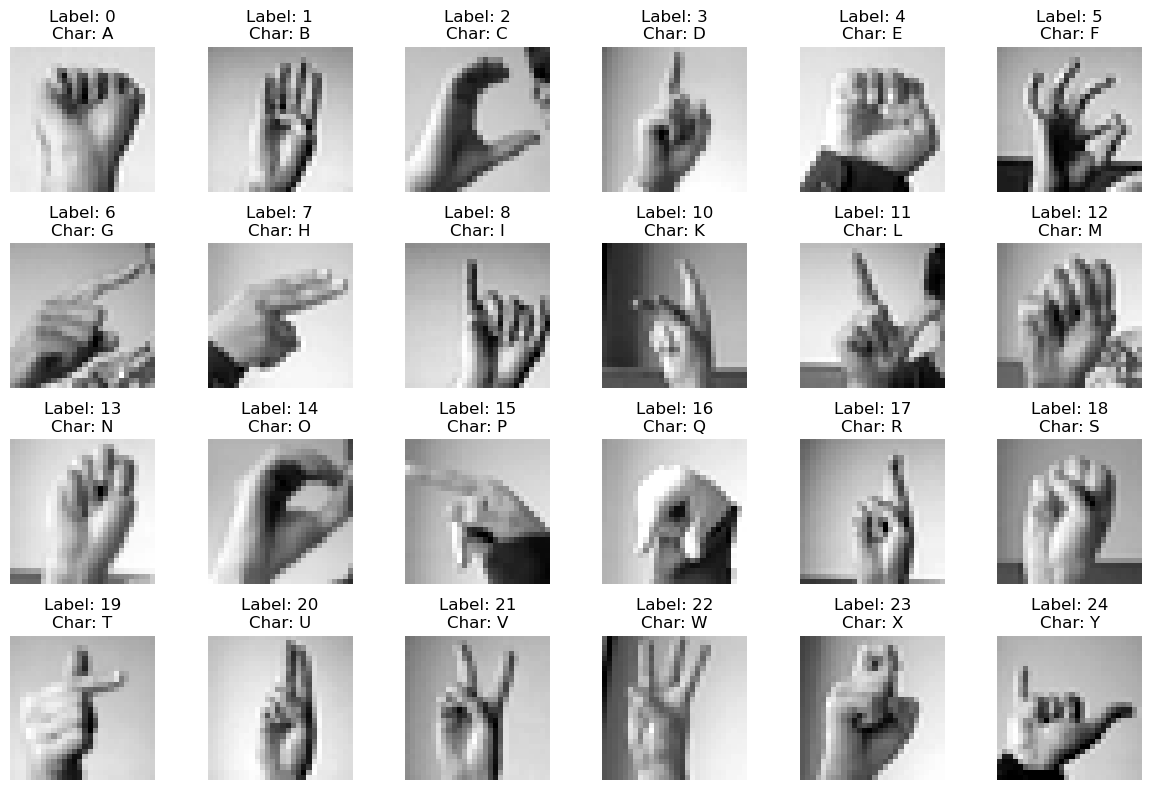

In [53]:
import matplotlib.pyplot as plt

# Reverse mapping: index (0 to 23) -> corresponding letter (A to Z, without J)
index_to_letter = {
    0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I',
    10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q',
    17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24 :'Y'
}

# Find one sample per class from y_train
samples = {}
for i, label in enumerate(np.argmax(y_train, axis=1)):
    if label not in samples:
        samples[label] = i
    if len(samples) == 24:
        break

# Plot samples
plt.figure(figsize=(12, 8))
for idx, (label, i) in enumerate(sorted(samples.items())):
    plt.subplot(4, 6, idx + 1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {label}\nChar: {index_to_letter[label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

input_shape = (28, 28, 1)  # for grayscale images
num_classes = 25          

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,969 (886.60 KB)

 Trainable params: 226,969 (886.60 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

# Now train on X_train_final and validate on X_val
model.fit(X_train_final, y_train_final, 
          validation_data=(X_val, y_val),
          epochs=10, batch_size=64)

Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2579 - loss: 2.4691 - val_accuracy: 0.8543 - val_loss: 0.5562
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8142 - loss: 0.5782 - val_accuracy: 0.9680 - val_loss: 0.1373
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9167 - loss: 0.2611 - val_accuracy: 0.9931 - val_loss: 0.0485
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9541 - loss: 0.1403 - val_accuracy: 0.9956 - val_loss: 0.0287
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9673 - loss: 0.1019 - val_accuracy: 0.9993 - val_loss: 0.0125
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9786 - loss: 0.0710 - val_accuracy: 0.9982 - val_loss: 0.0093
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9814 - loss: 0.0577 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9844 - loss: 0.0515 - val_accu

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

model1 = Sequential([
    Input(shape=(28, 28, 1)),  # 👈 Explicit input layer

    # Block 1
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 3 (added)
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')  # 25 output classes
])
model1.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,305 (442.60 KB)

 Trainable params: 112,857 (440.85 KB)

 Non-trainable params: 448 (1.75 KB)

In [57]:
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

# Now train on X_train_final and validate on X_val
model1.fit(X_train_final, y_train_final, 
          validation_data=(X_val, y_val),
          epochs=10, batch_size=64)

Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.5654 - loss: 1.5402 - val_accuracy: 0.6599 - val_loss: 1.1462
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9857 - loss: 0.0553 - val_accuracy: 0.9894 - val_loss: 0.0427
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9827 - loss: 0.0607 - val_accuracy: 0.9993 - val_loss: 0.0114
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9973 - loss: 0.0114 - val_accuracy: 0.9680 - val_loss: 0.1130
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9797 - loss: 0.0663 - val_accuracy: 0.9847 - val_loss: 0.0492
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9967 - loss: 0.0127 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 8.6168e-05
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.9994 - loss: 0.002

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Create an augmented data generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

# Step 2: Fit it on training data only
datagen.fit(X_train_final)

# Step 3: Train the model using flow
history_aug = model1.fit(
    datagen.flow(X_train_final, y_train_final, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=10
)

Epoch 1/10


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


387/387 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.8308 - loss: 0.6485 - val_accuracy: 0.9687 - val_loss: 0.0950
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9415 - loss: 0.1855 - val_accuracy: 0.5058 - val_loss: 3.9851
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9519 - loss: 0.1518 - val_accuracy: 0.9902 - val_loss: 0.0235
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9686 - loss: 0.0993 - val_accuracy: 0.9964 - val_loss: 0.0141
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9743 - loss: 0.0827 - val_accuracy: 0.9683 - val_loss: 0.1059
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9791 - loss: 0.0683 - val_accuracy: 0.9927 - val_loss: 0.0237
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9813 - loss: 0.0611 - val_accuracy: 0.9843 - val_loss: 0.0521
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9808 - loss: 0.0651 - val_accurac

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=3,              # Stop if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore model weights from best epoch
)

In [60]:
history_aug_ES = model1.fit(
    datagen.flow(X_train_final, y_train_final, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=30,                      # ⬅️ Increase max epochs (EarlyStopping will stop earlier)
    callbacks=[early_stop],        # ⬅️ Attach early stopping
    verbose=1
)

Epoch 1/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9830 - loss: 0.0563 - val_accuracy: 0.9978 - val_loss: 0.0084
Epoch 2/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9868 - loss: 0.0427 - val_accuracy: 0.9945 - val_loss: 0.0100
Epoch 3/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9880 - loss: 0.0379 - val_accuracy: 0.9956 - val_loss: 0.0135
Epoch 4/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9850 - loss: 0.0496 - val_accuracy: 0.9975 - val_loss: 0.0060
Epoch 5/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9885 - loss: 0.0380 - val_accuracy: 0.9931 - val_loss: 0.0245
Epoch 6/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9897 - loss: 0.0311 - val_accuracy: 0.9701 - val_loss: 0.0984
Epoch 7/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9865 - loss: 0.0385 - val_accuracy: 0.9585 - val_loss: 0.1487


In [61]:
label_map = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I',
    10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q',
    17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24 :'Y'
}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Predicted Class: 21
Predicted Letter: V


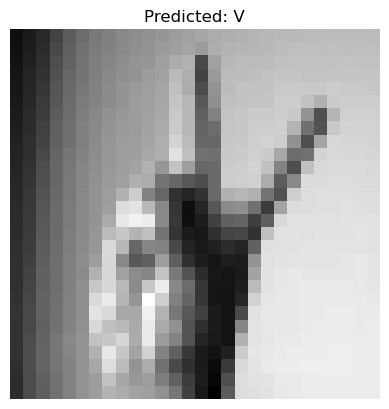

In [62]:
# Check prediction on test set image
idx = 5
test_img = X_test[idx]
test_img_input = np.expand_dims(test_img, axis=0)  # shape (1, 28, 28, 1)
prediction = model1.predict(test_img_input)

predicted_class = np.argmax(prediction)
predicted_letter = label_map.get(predicted_class, "Unknown")

print(f"Predicted Class: {predicted_class}")
print(f"Predicted Letter: {predicted_letter}")

plt.imshow(test_img.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_letter}")
plt.axis('off')
plt.show()

In [63]:
from PIL import Image
import numpy as np

# Load image and convert to grayscale
img = Image.open(r"C:\Users\HP\Downloads\images (2).jpg").convert('L')   # 'L' mode = grayscale
img = img.resize((28, 28))  # Resize to match model input

# Convert to numpy array and normalize
img_array = np.array(img) / 255.0  # Normalize to [0,1]
img_array = img_array.reshape(1, 28, 28, 1)  # Model expects (1,28,28,1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Letter: V


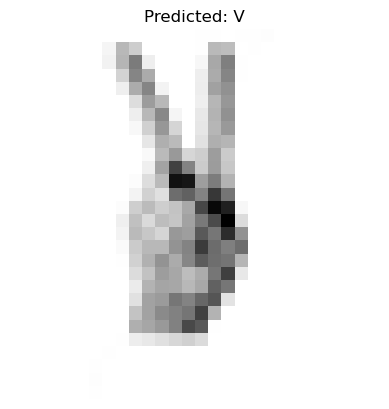

In [64]:
prediction = model1.predict(img_array)
predicted_class = np.argmax(prediction)
predicted_letter = label_map.get(predicted_class, "Unknown")

print(f"Predicted Letter: {predicted_letter}")
plt.imshow(img_array.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_letter}")
plt.axis('off')
plt.show()

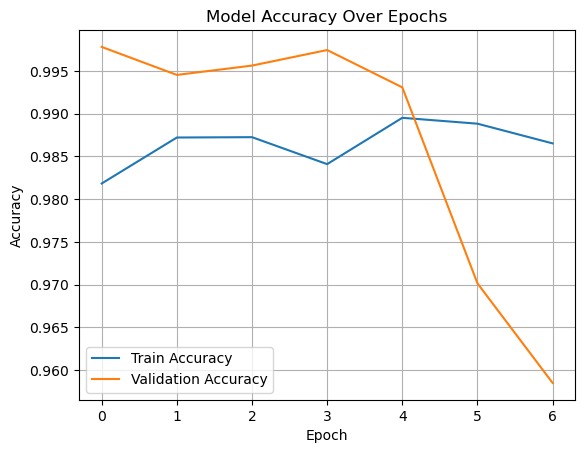

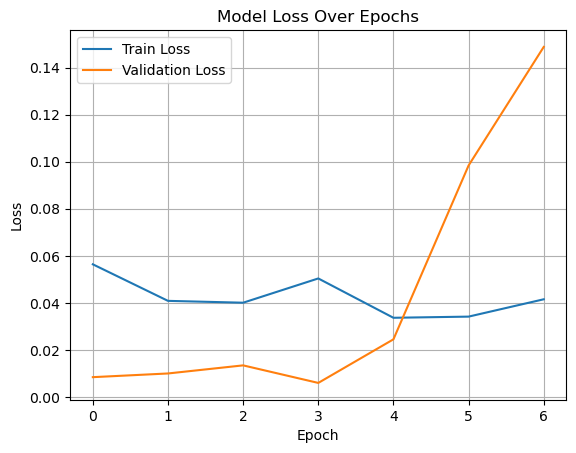

In [65]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history_aug_ES.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug_ES.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history_aug_ES.history['loss'], label='Train Loss')
plt.plot(history_aug_ES.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


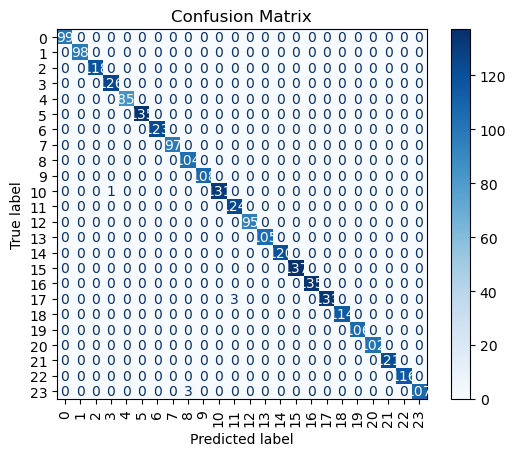

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on validation data
y_pred = model1.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


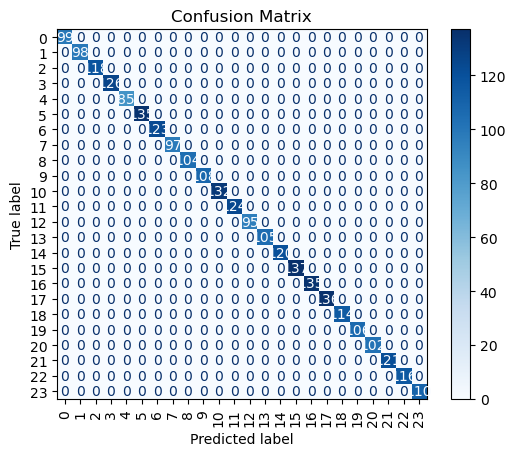

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [68]:
model1.save("asl_model.keras")